In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import utils

In [2]:
load_dotenv()
preprocessed_data_dir = os.getenv("PREPROCESSED_DATA_DIR")
raw_data_dir = os.getenv("RAW_DATA_DIR")
zaineb_data_dir = os.getenv("ZAINEB_TRAIN_DATA_DIR")

### MSLesSeg Dataset

In [3]:
volume_path = "train/P1/T1/P1_T1_FLAIR.nii.gz"
utils.inspect_volume(os.path.join(preprocessed_data_dir, volume_path))


=== Volume : P1_T1_FLAIR.nii.gz ===
Dimensions       : (182, 218, 182)
Spacing          : (1.0, 1.0, 1.0)
Origin           : (-90.0, 126.0, -72.0)
Direction        : (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type       : 32-bit float
Number of voxels : 7221032


In [4]:
volume_path = "P1/T1/P1_T1_FLAIR.nii.gz"
utils.inspect_volume(os.path.join(raw_data_dir, volume_path))


=== Volume : P1_T1_FLAIR.nii.gz ===
Dimensions       : (512, 512, 81)
Spacing          : (0.4882812201976776, 0.4882812201976776, 2.299999952316284)
Origin           : (-111.91812133789062, 119.79441833496094, -41.866886138916016)
Direction        : (0.9935119722370206, 0.041278039594269934, -0.10597209382592467, 0.012653328838271168, -0.9661416382946556, -0.2577018332049522, 0.11302147712278476, -0.2546889440093007, 0.9603955854193398)
Pixel Type       : 32-bit float
Number of voxels : 21233664


### MSSEG 1 Dataset

In [5]:
volume_path = "imagesTr/01016SACH_0000.nii.gz"
utils.inspect_volume(os.path.join(zaineb_data_dir, volume_path))


=== Volume : 01016SACH_0000.nii.gz ===
Dimensions       : (261, 336, 336)
Spacing          : (0.6999969482421875, 0.7440476417541504, 0.7440476417541504)
Origin           : (-91.69630432128906, -120.73550415039062, -129.41156005859375)
Direction        : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type       : 32-bit float
Number of voxels : 29465856


In [6]:
volume_path = "labelsTr/01016SACH.nii.gz"
utils.inspect_volume(os.path.join(zaineb_data_dir, volume_path))


=== Volume : 01016SACH.nii.gz ===
Dimensions       : (261, 336, 336)
Spacing          : (0.6999969482421875, 0.7440476417541504, 0.7440476417541504)
Origin           : (-91.69630432128906, -120.73550415039062, -129.41156005859375)
Direction        : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type       : 16-bit signed integer
Number of voxels : 29465856


In [7]:
volume_path = "labelsTr_corrected/01016SACH.nii.gz"
utils.inspect_volume(os.path.join(zaineb_data_dir, volume_path))


=== Volume : 01016SACH.nii.gz ===
Dimensions       : (261, 336, 336)
Spacing          : (0.6999969482421875, 0.7440476417541504, 0.7440476417541504)
Origin           : (-91.69630432128906, -120.73550415039062, -129.41156005859375)
Direction        : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type       : 32-bit float
Number of voxels : 29465856


### Transform image

In [8]:
ref_path = "imagesTr/01016SACH_0000.nii.gz"
img_path = "train/P1/T1/P1_T1_FLAIR.nii.gz"
utils.MSLesSeg_to_MSSEG(
    os.path.join(zaineb_data_dir, ref_path),
    os.path.join(preprocessed_data_dir, img_path),
    "./P1_T1_FLAIR_matched.nii.gz"
)

Corrected image saved in : ./P1_T1_FLAIR_matched.nii.gz


In [9]:
def plot_three_views(img, slice_index=None, title="3 vues"):
    # Convertir en array numpy (z, y, x)
    arr = sitk.GetArrayFromImage(img)

    # Indices milieu
    if slice_index is None:
        z = arr.shape[0] // 2   # axial
        y = arr.shape[1] // 2   # coronal
        x = arr.shape[2] // 2   # sagittal

    axial   = arr[z, :, :]
    coronal = arr[:, y, :]
    sagittal= arr[:, :, x]

    plt.figure(figsize=(15,5))
    
    # Vue axiale
    plt.subplot(1,3,1)
    plt.imshow(axial, cmap="gray")
    plt.title("Axial")
    plt.axis("off")

    # Vue coronale
    plt.subplot(1,3,2)
    plt.imshow(coronal, cmap="gray")
    plt.title("Coronal")
    plt.axis("off")

    # Vue sagittale
    plt.subplot(1,3,3)
    plt.imshow(sagittal, cmap="gray")
    plt.title("Sagittal")
    plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.show()

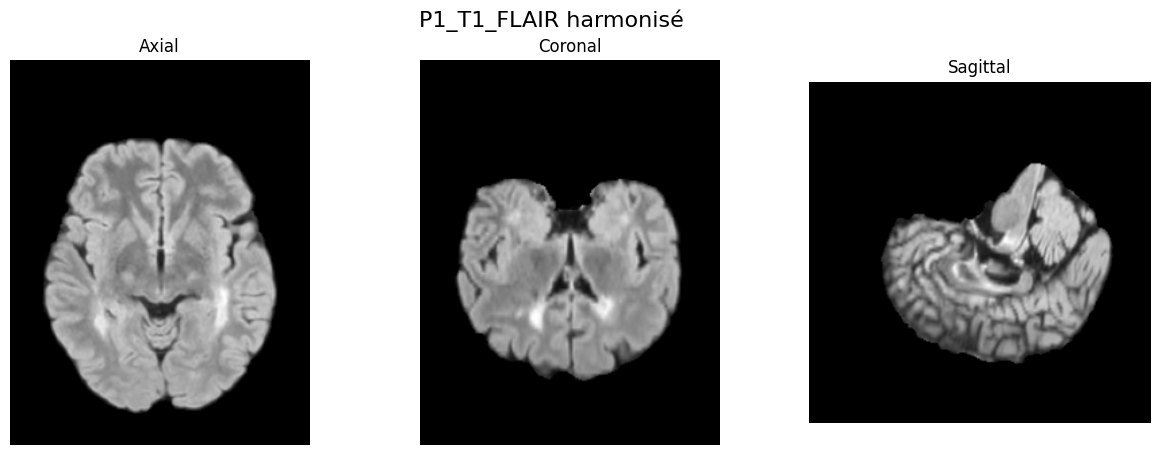

In [10]:
img = sitk.ReadImage("P1_T1_FLAIR_matched.nii.gz")
plot_three_views(img, title="P1_T1_FLAIR harmonisé")